<a href="https://colab.research.google.com/github/codekikicode/python-coding-folio/blob/main/Pretrained_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-07-28 02:22:59--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Donkey_in_Clovelly%2C_North_Devon%2C_England.jpg/640px-Donkey_in_Clovelly%2C_North_Devon%2C_England.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132003 (129K) [image/jpeg]
Saving to: ‘donkey.jpg’

donkey.jpg          100%[===================>] 128.91K  --.-KB/s    in 0.05s   

2025-07-28 02:22:59 (2.29 MB/s) - ‘donkey.jpg’ saved [132003/132003]



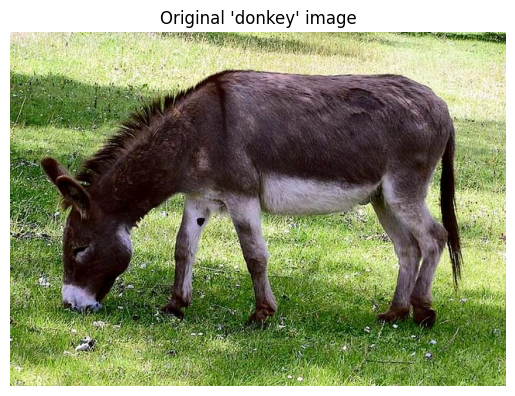

In [ ]:
# **STEP 1: Download and display 'donkey' image

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Donkey_in_Clovelly%2C_North_Devon%2C_England.jpg/640px-Donkey_in_Clovelly%2C_North_Devon%2C_England.jpg"
!wget -O donkey.jpg "{image_url}"

from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("donkey.jpg")
plt.imshow(img)
plt.axis('off')
plt.title("Original 'donkey' image")
plt.show()


In [ ]:
# **STEP 2: Predict with AlexNet and ResNet101

import torchvision.models as models
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

img_t = transform(img).unsqueeze(0).to(device)

# -Load pretrained models
alexnet = models.alexnet(pretrained=True).to(device).eval()
resnet101 = models.resnet101(pretrained=True).to(device).eval()

# -Download ImageNet class labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
with open("imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

# -Function for top-5 predictions
def predict_top5(model, img_t, labels):
    with torch.no_grad():
        outputs = model(img_t)
        probs = torch.nn.functional.softmax(outputs, dim=1)[0]
        top5 = torch.topk(probs, 5)
        for i, idx in enumerate(top5.indices):
            print(f"{i+1}: {labels[idx]} ({probs[idx]:.4f})")

print("\nTop-5 predictions by AlexNet:")
predict_top5(alexnet, img_t, labels)

print("\nTop-5 predictions by ResNet101:")
predict_top5(resnet101, img_t, labels)

--2025-07-28 02:23:06--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2025-07-28 02:23:06 (69.6 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]


Top-5 predictions by AlexNet:
1: Scottish deerhound (0.4508)
2: Irish wolfhound (0.4248)
3: kelpie (0.0169)
4: flat-coated retriever (0.0116)
5: groenendael (0.0113)

Top-5 predictions by ResNet101:
1: gazelle (0.8468)
2: impala (0.0661)
3: llama (0.0255)
4: ibex (0.0110)
5: ox (0.0102)



Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 34.14 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix/pytorch-CycleGAN-and-pix2pix/pytorch-CycleGAN-and-pix2pix/pytorch-CycleGAN-and-pix2pix/pytorch-CycleGAN-and-pix2pix
Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2025-07-28 02:23:24--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efros

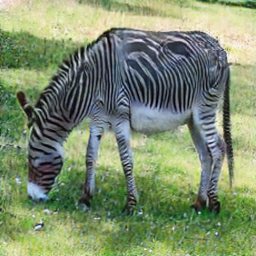

In [ ]:
# **STEP 3: Apply CycleGAN (Horse2Zebra)

print("\nDownloading CycleGAN and converting donkey to zebra...")

#- Clone repo and download model
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd pytorch-CycleGAN-and-pix2pix/
!bash ./scripts/download_cyclegan_model.sh horse2zebra

# -Prepare input image
!mkdir -p ./datasets/donkey/images
!cp /content/donkey.jpg ./datasets/donkey/images/

!python test.py --dataroot ./datasets/donkey --name horse2zebra_pretrained --model test --no_dropout

# -Dynamically find the output zebra image
import glob
fake_img = glob.glob('./results/horse2zebra_pretrained/test_latest/images/*fake*.png')[0]
print(f"Zebra image generated: {fake_img}")

# -Display the zebra image
from IPython.display import Image as IPImage
IPImage(filename=fake_img)


CycleGAN was able to partially convert the donkey into a zebra by applying zebra-like stripes and changing color and size of the tail. However, the donkey’s body shape, pose, and background remained the same because CycleGAN performs style transfer, not structural transformation.


In [ ]:
# **STEP 4: Build ResNet101 using PyTorch Hub and predict final class label

print("\nBuilding ResNet101 from PyTorch Hub...")
resnet101_hub = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True).to(device).eval()

with torch.no_grad():
    output = resnet101_hub(img_t)
    _, predicted = output.max(1)
    print("\nPredicted class using ResNet101 (Hub):", labels[predicted.item()])



Building ResNet101 from PyTorch Hub...


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0



Predicted class using ResNet101 (Hub): gazelle
